# Logistic Regression Theory

Logistic Regression has a long history in statistics for modeling binary dependent variables in pass/fail systems, and given the binomial nature of logic and memory, logistic models can be an ideal solution for within-die electrical testing, defect-threshold studie, and even image classification from scattering/transmission electron microscopy. 

Depite regression being at the heart of the algorithm, basic LR methodology applies a logistic function to said regressor yielding a binomial probability (0>=1 real), which typically suits LR for classification tasks rather than true regression problems.

Though a relatively basic algorithm, logistic regression shares some parallels to deep learning approaches (aNN's, rNN's), which makes it a good primer for understanding Neural Networks.

## Theory 

The setup for Logistic Regression starts with building a simple Linear Regressor.

* **Given $X$, $\hat{y} = P(y=1|x)$ where $X \space \in \space \mathbb{R}^{n_x}$**
    * This reads that our predicted value ($\hat{y}$) is the probabiliy that $y=1$, given some parameter $x$, where $X$ is a $n_x$ dimensional vector
* **Regressor: $\hat{y} = w^Tx + b \space $ with parameters $w \space \in \space \mathbb{R}^{n_x}, \space b \space \in \space \mathbb{R}$**

Here, we've set up a simple linear regressor. But obviously, this alone wont output a probability, as there exists $w^Tx + b > 1$ and $w^Tx + b < 0$. But we could certainly apply a function to this regressor to satisfy $(0 < \hat{y} < 1)$. Enter the *sigmoid function...*
* **Sigmoid function: $ \large \sigma(z) = \frac{1}{1 + e^{-z}}$** where $z$ is the output of some linear function

Text(0.5,0,'Input')

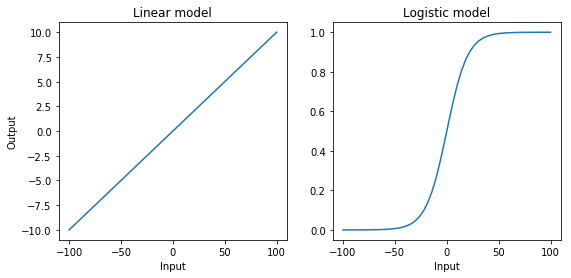

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

x = np.linspace(-100, 100)
lin = 0.1*x
log =  1 / (1 + np.exp(-lin))

axes[0].plot(x, lin)
axes[0].set_title('Linear model')
axes[0].set_ylabel('Output')
axes[0].set_xlabel('Input')

axes[1].plot(x, log)
axes[1].set_title('Logistic model');
axes[1].set_xlabel('Input')

While a linear function assumes no limit (left), applying a sigmoid function to a linear model bounds the output to exist between 0 and 1 (right). With this piece of the puzzle, we can use regression to model probability of a binary system. Thus a logistic regression model can be notated as...

$\large \hat{y}^{(i)} = \sigma(w^Tx^{(i)} + b)\space$  where  $\space \large \sigma(z) = \frac{1}{1 + e^{-z}}$



## Loss Function 
This theory is enough to start modeling small datasets, but to train a functional classifier requires a well defined loss function. With a model and a loss function, reconciliation of the two becomes an optimization problem. This is the essence of *training* a model: the process of optimizing the hyperparameters of the model to (hopefully) arrive at a minimum in the loss function.

There are plenty of well-known loss functions that perform well on even more robust models (rMSE, MAE, etc), but its important that the loss function reflects the model it's constricting. (It's also important to build a LF that will lend itself to a convex Cost Function, or at least one that will converge well at the minimum. More on that later). In this case, it stands to reason a logistic model would be best served by a logistic loss function.

$ \large L(\hat{y}, y) = - (y \space log\hat{y} \space + \space (1-y)\space log(1-\hat{y})$

As a thought exercise, if you try plugging in values ($y=0$ or $y=1$), you'll notice terms start to drop in favor of the "true" value...

**When $y=1: L(\hat{y}, y) = -\space log\hat{y} $**
* Thus, you want you predicted value ($\hat{y}$) to be as close to $1$ as possible

**When $y=0: L(\hat{y}, y) = -\space log(1-\hat{y})$**
* Thus, you want you predicted value ($\hat{y}$) to be as close to $0$ as possible

## Cost Function
What's the difference between a loss function and a cost function? While they're interrelated, the distinction is important. While a Loss Function evaluates a *single* instance of the training data, a Cost Function reflects the average performance across the *entire* training data. To put it another way, the Cost Function defines the *cost* of your parameters $w$ and $b$. Thus the cost function can be annotated...

$\large J(w, b) = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^{(i)}, y^{(i)})$

Where $w$, $b$ are parameters of the regressor defined earlier. Including the Loss function for a comprehensive Cost function... 

$\large J(w, b) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)} \space log\hat{y}^{(i)} \space + \space (1-y^{(i)})\space log(1-\hat{y}^{(i)}]$

## Code 

Implementation of a sigmoid function can be done simply as below.

In [ ]:
import numpy as np

def sigmoid(x):
    """
    Helper function to compute the sigmoid of a given array
    
    input
    -----
    x: ndarray-like, output vector of linear function
    
    output
    -----
    s: ndarray-like, sigmoid of input"""
    
    sig = 1/(1+np.exp(-x))
    return sig

We can code a helper function to initialize values for our linear params, and a function for forward propagation between the parameters $w$ and $b$ arriving at a resulting cost function.

In [2]:
def init_wb(size, init_val=0):
    """
    Function to initialize weights vector/bias term 
    
    input
    -----
    size: int
        length of weights vector
    kind: int or float
        value to init 
        
    output
    -----
    w, b
        """
    if init_val == 0:
        w = np.zeros((size, 1))
        b = 0
    else:
        w = np.ones((size, 1)) * init_val
        b = init_val
    return w, b

def propagation(X, y, w, b):
    """
    Compute resulting cost function and gradients from
    forward propagation and backward propagation respectively
    
    input
    -----
    X: ndarray-like, training set to fit
    y: vector-like, X's corresponding target
    w: weight vector
    b: bias term
    
    output
    ------
    dict
        cost: vector-like, cost of weight, bias terms
    """
    
    samples = X.shape[1]
    
    # Forward Propagation (left to right)
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/samples) * np.sum(y * np.log(A) + (1 - y)*(np.log(1 - A)))

    return {'cost':np.squeeze(cost)}

Now that we have defined the important pieces to the algorithm, we have an optimization problem. See "Gradient_Descent.ipynb" on how to optimize a LR model.